# Energy Optimization Project EDA

Dataset: Production line dataset for task scheduling and energy optimization - Schedule Optimization
https://zenodo.org/records/4106746 

In [1]:
import pandas as pd
import json

with open("data/Input_JSON_Schedule_Optimization.json") as f:
    data = json.load(f)

print(json.dumps(data, indent=2))

{
  "cells": [
    {
      "id": "factory",
      "machines": [
        "MAQ118",
        "MAQ119",
        "MAQ120"
      ]
    }
  ],
  "task_modes": [
    {
      "id": "Ironing TM1",
      "power": [
        66,
        258,
        337,
        285,
        228,
        227,
        266,
        354,
        1194
      ]
    },
    {
      "id": "Ironing TM3",
      "power": [
        672,
        1178,
        884,
        625,
        621,
        577,
        560,
        557,
        311
      ]
    },
    {
      "id": "Ironing TM4",
      "power": [
        1109,
        611,
        1025,
        643,
        910,
        695,
        1654,
        220,
        1204,
        210,
        1129,
        221
      ]
    },
    {
      "id": "Harden[0.5] TM1",
      "power": [
        1782,
        1224,
        1355,
        1266,
        1254,
        1256,
        1223,
        1207,
        1225,
        1183,
        1317,
        187
      ]
    },
    {
      "id": "Hard

### Viewing the data in Input_Schema as pandas dfs

In [2]:
print(f"Keys in JSON data: {list(data.keys())}\n")

Keys in JSON data: ['cells', 'task_modes', 'tasks', 'machines', 'products', 'constraints', 'energy_sources', 'product_requests', 'configuration']



In [3]:
# We have a single factory (cell) with three machines in this dataset

cells = pd.json_normalize(data["cells"])
cells

,id,machines
0,factory,"[MAQ118, MAQ119, MAQ120]"


In [4]:
# machines have their specific task_modes they can perform

machines = pd.json_normalize(data["machines"])
print(machines)
print(machines)

       id                                         task_modes
0  MAQ118  [Ironing TM4, Harden[2] TM1, Harden[1.5] TM3, ...
1  MAQ119  [Harden[1] TM1, Ironing TM3, Harden[0.5] TM1, ...
2  MAQ120  [Ironing TM1, Anti-Shrinkage TM2, Sublimation ...
       id                                         task_modes
0  MAQ118  [Ironing TM4, Harden[2] TM1, Harden[1.5] TM3, ...
1  MAQ119  [Harden[1] TM1, Ironing TM3, Harden[0.5] TM1, ...
2  MAQ120  [Ironing TM1, Anti-Shrinkage TM2, Sublimation ...


In [5]:
# tasks are the operations that are scheduled on machines
# Each task can have multiple modes (machines that can perform the task)

# Ironing can be done with Ironing TM1, Ironing TM3, Ironing TM4
# However, Sublimation can only be done using Sublimation TM2

tasks = pd.json_normalize(data["tasks"])
tasks

,id,task_modes
0,Ironing,"[Ironing TM1, Ironing TM3, Ironing TM4]"
1,Harden[0.5],"[Harden[0.5] TM1, Harden[0.5] TM4]"
2,Harden[1],"[Harden[1] TM1, Harden[1] TM2, Harden[1] TM5]"
3,Harden[1.5],"[Harden[1.5] TM1, Harden[1.5] TM3]"
4,Harden[2],[Harden[2] TM1]
5,Sublimation,[Sublimation TM3]
6,Anti-Shrinkage,[Anti-Shrinkage TM2]


In [6]:
# task modes are the different ways a task can be performed on different machines
# the power represents the energy consumption rate of the machine when performing that task mode for each step
# the steps are every 7.5 minutes
# 0's mean that the machine is not consuming during that step, i.e. part is cooling or waiting, however the machine is still reserved for that task

task_modes = pd.json_normalize(data["task_modes"])
durations = {}
for mode in task_modes['id']:
    durations[mode] = len(task_modes[task_modes['id'] == mode]['power'].values[0])

print(durations)
task_modes



{'Ironing TM1': 9, 'Ironing TM3': 9, 'Ironing TM4': 12, 'Harden[0.5] TM1': 12, 'Harden[0.5] TM4': 5, 'Harden[1] TM1': 16, 'Harden[1] TM2': 5, 'Harden[1] TM5': 9, 'Harden[1.5] TM1': 25, 'Harden[1.5] TM3': 15, 'Harden[2] TM1': 23, 'Sublimation TM3': 4, 'Anti-Shrinkage TM2': 7}


,id,power
0,Ironing TM1,"[66, 258, 337, 285, 228, 227, 266, 354, 1194]"
1,Ironing TM3,"[672, 1178, 884, 625, 621, 577, 560, 557, 311]"
2,Ironing TM4,"[1109, 611, 1025, 643, 910, 695, 1654, 220, 12..."
3,Harden[0.5] TM1,"[1782, 1224, 1355, 1266, 1254, 1256, 1223, 120..."
4,Harden[0.5] TM4,"[654, 785, 86, 53, 0]"
5,Harden[1] TM1,"[1184, 861, 9, 223, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,Harden[1] TM2,"[1167, 1167, 1167, 1196, 1155]"
7,Harden[1] TM5,"[1687, 1681, 1674, 1665, 800, 1665, 757, 1539,..."
8,Harden[1.5] TM1,"[1269, 1224, 1237, 1242, 1237, 1199, 1206, 120..."
9,Harden[1.5] TM3,"[510, 1624, 520, 1631, 506, 1628, 503, 3272, 9..."


#### How do These Fit Together?

There is a single factory with three machines. The machines have task_modes that they can perform; however each machine can only run one of its task_modes at a time. Specfic tasks can be done on different machines as long as they have the correct task_mode.

In [7]:
# products represent the items being manufactured in the factory
# the taks associated represent the sequence of operations needed to produce the product
# I.e. WOVEN LABEL OURELA FARBRIC requires 1 run of ironing, 2 runs of Harden[1], and 1 run of Harden[0.5], IN ANY ORDER

products = pd.json_normalize(data["products"])
products

,id,tasks
0,WOVEN LABEL OURELA FABRIC,"[{'task': 'Ironing', 'runs': 1}, {'task': 'Har..."
1,ESTORE RIBBON,"[{'task': 'Ironing', 'runs': 3}]"
2,WOVEN LABEL OURELA CUT,"[{'task': 'Ironing', 'runs': 3}, {'task': 'Har..."
3,GORGORÃƒO RIBBON,"[{'task': 'Ironing', 'runs': 1}]"
4,GORGORÃƒO RIBBON W/ INSCR,"[{'task': 'Ironing', 'runs': 1}]"
5,TAFFETA EMBLEM,"[{'task': 'Harden[1]', 'runs': 1}]"
6,PRINTED RIBBON,"[{'task': 'Sublimation', 'runs': 1}, {'task': ..."
7,ELASTIC W/ INSCR,"[{'task': 'Ironing', 'runs': 1}, {'task': 'Ant..."
8,ROK ELASTIC,"[{'task': 'Harden[2]', 'runs': 1}, {'task': 'H..."
9,SMOOTH STRAP(A),"[{'task': 'Ironing', 'runs': 1}]"


In [8]:
# The constraints represent the ordering for tasks for each product
# only two are given in this dataset

constraints = pd.json_normalize(data["constraints"])
constraints

,type,parameter.first_task,parameter.second_task,parameter.task1,parameter.task2
0,Order,Harden[1.5],Harden[2],NaN,NaN
1,Collision,NaN,NaN,Sublimation,Harden[2]


In [9]:

# Socket energy are grid sourced energy that costs money, always available but price varies throughout the day
# solar power is free energy generated onsite, however it is intermittent

# price for socket energy is price per kWh for each time step (5? minutes)
# available solar power is kW generated at each time step 

energy_sources = pd.json_normalize(data["energy_sources"])
energy_sources

,id,price,availability
0,Socket Energy,"[6.861e-05, 6.861e-05, 6.861e-05, 6.861e-05, 6...",NaN
1,Solar,NaN,"[157.8, 157.2, 183.6, 225.6, 228.0, 214.2, 204..."


In [10]:
# The throughput needed
# Elastic w/ inscr needs to be done earlier (day 5), everythign else is day 6

product_requests = pd.json_normalize(data["product_requests"])
product_requests

,product,amount,deadline
0,WOVEN LABEL OURELA FABRIC,13,NaN
1,ESTORE RIBBON,6,NaN
2,WOVEN LABEL OURELA CUT,5,NaN
3,GORGORÃƒO RIBBON,13,NaN
4,GORGORÃƒO RIBBON W/ INSCR,5,NaN
5,TAFFETA EMBLEM,10,NaN
6,PRINTED RIBBON,30,NaN
7,ELASTIC W/ INSCR,2,NaN
8,ELASTIC W/ INSCR,1,960.0
9,ROK ELASTIC,3,NaN


In [11]:
# there are 1152 discrete time steps in the simulation, 8640 minutes, or 6 days at 7.5 minute intervals
# time_leap is associated with the dataset's paper, each time represents the last step in the day, no operrations can run past the step

configuration = pd.json_normalize(data["configuration"])
configuration

,time_window,time_leap,stop_condition.seconds
0,1152,"[192, 384, 576, 768, 960]",7200


## EDA

In [12]:
# MAQ118 has has 4 Hardening, 1 Ironing
# MAQ119 has 3 Hardening, 1 Ironing
# MAQ120 has 1 Ironing, 1 Anti-Shrinkage, 1 Sublimation

machines

,id,task_modes
0,MAQ118,"[Ironing TM4, Harden[2] TM1, Harden[1.5] TM3, ..."
1,MAQ119,"[Harden[1] TM1, Ironing TM3, Harden[0.5] TM1, ..."
2,MAQ120,"[Ironing TM1, Anti-Shrinkage TM2, Sublimation ..."


In [13]:
task_modes

,id,power
0,Ironing TM1,"[66, 258, 337, 285, 228, 227, 266, 354, 1194]"
1,Ironing TM3,"[672, 1178, 884, 625, 621, 577, 560, 557, 311]"
2,Ironing TM4,"[1109, 611, 1025, 643, 910, 695, 1654, 220, 12..."
3,Harden[0.5] TM1,"[1782, 1224, 1355, 1266, 1254, 1256, 1223, 120..."
4,Harden[0.5] TM4,"[654, 785, 86, 53, 0]"
5,Harden[1] TM1,"[1184, 861, 9, 223, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6,Harden[1] TM2,"[1167, 1167, 1167, 1196, 1155]"
7,Harden[1] TM5,"[1687, 1681, 1674, 1665, 800, 1665, 757, 1539,..."
8,Harden[1.5] TM1,"[1269, 1224, 1237, 1242, 1237, 1199, 1206, 120..."
9,Harden[1.5] TM3,"[510, 1624, 520, 1631, 506, 1628, 503, 3272, 9..."


## Look at the Grid Cost and Solar Availability over the 6 Days

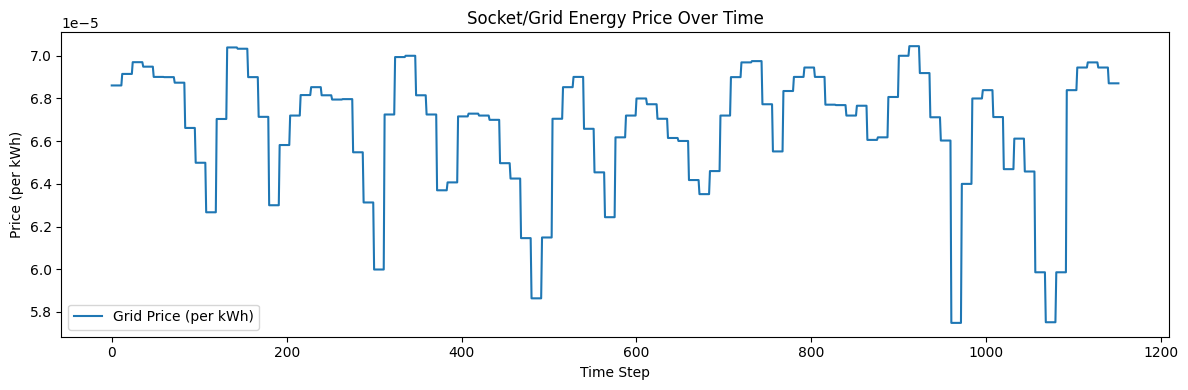

In [14]:
# map the grid prices as a graph

import matplotlib.pyplot as plt

# Extract the socket energy prices and time steps
socket_row = energy_sources[energy_sources["id"] == "Socket Energy"]
if not socket_row.empty:
    prices = socket_row["price"].iloc[0]
    # handle if prices is a string or list of strings
    if isinstance(prices, str):
        import ast
        prices = ast.literal_eval(prices)
    plt.figure(figsize=(12, 4))
    plt.plot(prices, label="Grid Price (per kWh)")
    plt.xlabel("Time Step")
    plt.ylabel("Price (per kWh)")
    plt.title("Socket/Grid Energy Price Over Time")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Socket Energy row not found in energy_sources")



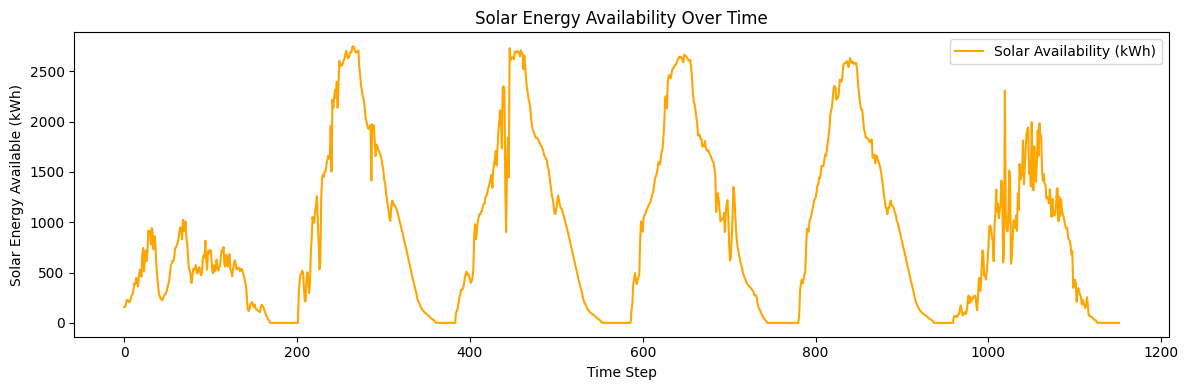

In [15]:
# Plot the solar availability as a line chart

# Extract the solar availability row and values
solar_row = energy_sources[energy_sources["id"] == "Solar"]
if not solar_row.empty:
    solar_availability = solar_row["availability"].iloc[0]
    # handle if it is a string or list of strings
    if isinstance(solar_availability, str):
        import ast
        solar_availability = ast.literal_eval(solar_availability)
    plt.figure(figsize=(12, 4))
    plt.plot(solar_availability, color="orange", label="Solar Availability (kWh)")
    plt.xlabel("Time Step")
    plt.ylabel("Solar Energy Available (kWh)")
    plt.title("Solar Energy Availability Over Time")
    plt.legend()
    plt.tight_layout()
    plt.show()